### Задание
Прочитать про методы оптимизации для нейронных сетей https://habr.com/post/318970/  
Реализовать самостоятельно логистическую регрессию  
Обучить ее методом градиентного спуска  
Методом nesterov momentum  
Методом rmsprop  
*Дополнительное задание:  
В качестве dataset’а взять `Iris`, оставив 2 класса:  
Iris Versicolor  
Iris Virginica* 

In [96]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

In [97]:
iris = datasets.load_iris()
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [98]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [99]:
X = []
y = []
for idx, item in enumerate(iris.target):
    if item != 0:
        X.append(iris.data[idx])
        y.append(item-1)

X = np.asarray(X)
y = np.asarray(y)
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [100]:
# Классифицирующая функция через сигмоиду
def predict(coefs, X):
    predict = coefs[0] + coefs[1] * X[:, 0] + coefs[2] * X[:, 1] + coefs[3] * X[:, 2] + coefs[4] * X[:, 3]
    sigm = 1. / (1 + np.exp(-predict))
    return sigm

### Метод градиентного спуска

In [101]:
lr = 0.05
coefs = []
coefs = np.random.normal(size=(5,))
print(coefs)
grad_loss_hist = []
for i in range(100):
    sigm = predict(coefs, X)
    coefs[0] -= lr * np.sum(sigm - y)/len(sigm)
    coefs[1] -= lr * np.sum((sigm - y) * X[:, 0])/len(sigm)
    coefs[2] -= lr * np.sum((sigm - y) * X[:, 1])/len(sigm)
    coefs[3] -= lr * np.sum((sigm - y) * X[:, 2])/len(sigm)
    coefs[4] -= lr * np.sum((sigm - y) * X[:, 3])/len(sigm)
    loss = - np.mean(np.log(sigm) * y + np.log(1 - sigm) * (1 - y))
    #print(coefs)
    grad_loss_hist.append(loss)

[ 0.30132758  1.62053592 -1.51913536 -1.43955223  2.31285074]


In [102]:
# количество ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(coefs, X))):
    if item != y[idx]:
        err += 1
err

24

In [103]:
# сравнение результатов классификации
rez_predict = np.matrix([np.around(predict(coefs, X)), y])
rez_predict

matrix([[0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0.,
         0., 0., 1., 0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
         1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1.,
         1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
         1., 0., 1., 0., 0., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
         1., 1., 1., 1.]])

### Метод nesterov momentum

In [104]:
# обучение модели методом nesterov momentum
vel_pred = np.zeros(5)
vel = np.zeros(5)
print(coefs)
nest_loss_hist = []
gamma = 0.975
for i in range(100):
    sigm = predict(coefs, X)
    loss = - np.mean(np.log(sigm) * y + np.log(1 - sigm) * (1 - y))
    nest_loss_hist.append(loss)
    
    sigm = predict(coefs - gamma * vel_pred, X)
    
    vel[0] = (gamma * vel_pred[0] + lr * np.sum(sigm - y))/len(sigm)
    vel[1] = (gamma * vel_pred[1] + lr * np.sum((sigm - y) * X[:, 0]))/len(sigm)
    vel[2] = (gamma * vel_pred[2] + lr * np.sum((sigm - y) * X[:, 1]))/len(sigm)
    vel[3] = (gamma * vel_pred[3] + lr * np.sum((sigm - y) * X[:, 2]))/len(sigm)
    vel[4] = (gamma * vel_pred[4] + lr * np.sum((sigm - y) * X[:, 3]))/len(sigm)
    coefs -= vel
    #print(coefs)

    vel_pred = vel

[ 0.08247428  0.93399542 -1.84673778 -1.01257909  2.68284416]


In [105]:
# количество ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(coefs, X))):
    if item != y[idx]:
        err += 1
err

22

### Метод RMSProp

In [106]:
# обучение модели методом RMSProp
e_sq_grad = np.zeros(5)
grad = np.zeros(5)
print(coefs)
rmsp_loss_hist = []
gamma = 0.975
eps = 0.00000001
for i in range(100):
    sigm = predict(coefs, X)
    loss = - np.mean(np.log(sigm) * y + np.log(1 - sigm) * (1 - y))
    rmsp_loss_hist.append(loss)
    grad[0] = np.sum(sigm - y)/len(sigm)
    grad[1] = np.sum((sigm - y) * X[:, 0])/len(sigm)
    grad[2] = np.sum((sigm - y) * X[:, 1])/len(sigm)
    grad[3] = np.sum((sigm - y) * X[:, 2])/len(sigm)
    grad[4] = np.sum((sigm - y) * X[:, 3])/len(sigm)
    
    e_sq_grad = gamma * e_sq_grad + (1 - gamma)  * grad ** 2
    
    coefs -= lr * grad / np.sqrt(e_sq_grad + eps)
    #print(coefs)

[-0.06884645  0.60795656 -2.0187193  -0.45724863  3.07073969]


In [107]:
# количество ошибок при классификации
err = 0
for idx, item in enumerate(np.around(predict(coefs, X))):
    if item != y[idx]:
        err += 1
err

7

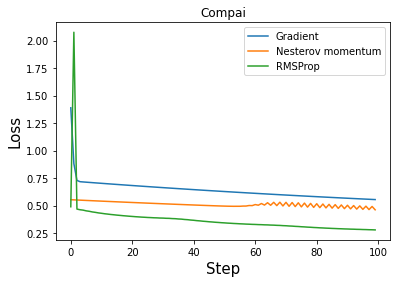

In [108]:
# Скорость убывания ошибки
plt.plot(range(100), grad_loss_hist, label = 'Gradient')
plt.plot(range(100), nest_loss_hist, label = 'Nesterov momentum')
plt.plot(range(100), rmsp_loss_hist, label = 'RMSProp')
plt.title('Compai')
plt.xlabel('Step', fontsize = 15)
plt.ylabel('Loss', fontsize = 15)
plt.legend()
plt.show()

# У RMSProp лучший результат